<a href="https://colab.research.google.com/github/rithikkulkarni/alda-homework/blob/main/hw3_p1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Instructions

1. Add your name and HW Group Number below.
2. Complete each question. Make sure you fill in any place that says `YOUR CODE HERE` or "YOUR ANSWER HERE", and delete and `throw NotImplementedError()` lines.
3. Where applicable, run the test cases *below* each question to check your work. **Note**: In addition to the test cases you can see, the instructor may run additional test cases, including using *other datasets* to validate you code.

In [ ]:
"""
Name: Rithik Kulkarni
HW Group Number: 2
"""

'\nName: Rithik Kulkarni\nHW Group Number: 2\n'

### HW3 Problem 1: Linear Regression

In this exercise, you will apply linear regression and Lasso regression methods to the dataset supplied to you and then compare their results to determine whether Lasso regression is needed for this dataset. Additionally, you will use sklearn's pipeline framework, which is so helpful when you have a sequence of transforms (e.g. normalization) and estimators (e.g. classifiers or regressors).

**Note**: This assignment will have less provided code - you have to write most of it yourself. Remember to use prior homeworks as examples, and **always use the suggested random seed** to ensure the test cases work as provided.

**Dataset description**: You are provided a dataset with 20 variables. Variables $x1\ -\ x19$ refer to the independent variables, while variable $y$ is your dependent variable. Training data is stored in the file `/etc/data/regression-train.csv`.

**Note on Test Cases**: TAs will use a test set to verify your solution. The format (independent variables $x1\ -\ x19$, dependent variable  $y$) will be same, but TAs' file may contain different number of data points than the split version from training set. Please ensure you take this into account, and do not hard code any dimensions.


In [ ]:
import warnings
warnings.filterwarnings('ignore')

# Part 0: Add necessary imports

As you work through the homework, don't forget to add imports.
We often put imports at the top of the file.
For this assignment, you'll likely want to import pandas and numpy.

In [ ]:
import pandas as pd
import numpy as np

## Part 1: Linear Regression and Lasso Regression

You will write code to normalize and train simple linear regression and Lasso Regression using scikit-learn.

### 1.1 Loading Dataset

Load a dataset into pandas data frame `df` from this file: `/etc/data/regression-train.csv`, assign columns $x1\ -\ x19$ to a variable `X`, and assign column $y$ to a variable `y`.

In [ ]:
#Read the data

df = pd.read_csv('/content/regression-train.csv')
X = df.iloc[:,:-1]
y = df.iloc[:,-1]


In [ ]:
import numpy as np
np.testing.assert_equal(df.shape, (132,20))

In [ ]:
# Note: we will run hidden test cases too

### 1.2 Train/Test Split

Create a 80% train / 20% test split, using **0** as the random state.

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [ ]:
np.testing.assert_equal(X_train.shape, (105,19))
np.testing.assert_equal(X_test.shape, (27,19))

In [ ]:
# Note: we will run hidden test cases too

### 1.3 Linear Regression v.s. Lasso CV

In this section you will compare a LinearRegression with standard hyperparameters to a LassoCV model.

Before your begin, read the documentation on sklearn's [LinearRegression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html) and [LassoCV](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LassoCV.html) - a Lasso regression model that uses CV to tune its hyperparameters.

**Note** that the lasso regression model has *built-in* crossvalidation, which it performs on the training dataset provided, to select the best shrinkage coefficient for the validation data.

For regression, it is particularly important to normalize our data before training the model (ensuring all variables are on the same scale), so we can better interpret our coefficients. For both models, make sure data is scaled first using **a standard scaler**, fit to the training data. Hint: you can use the sklearn's [StandardScaler](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html) to achieve this.

Note that we could use a pipeline for this process, but to make things easier, we will instead normalize our `X_train` and `X_test` variables.

Complete the following:
1. Fit a StandardScaler to the training dataset, and the normalize the training and test datasets. (**Note**: we fit the scale only to the training dataset - just like our model - we cannot use the test dataset to fit any part of our pipeline).
2. Create both a LinearRegression model, and a LassoCV that uses **10 folds** for cross-validation and has a random state of **0**.
3. Then fit both models to the normalized training dataset.

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LassoCV

scaler = None
linear_regressor = None
Lasso_regressor = None

random_state = 0

# Scaling the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Ensuring normalization
for i in range(X_train.shape[1]):
    np.testing.assert_almost_equal(np.mean(X_train[:, i]), 0, decimal=6)
    np.testing.assert_almost_equal(np.std(X_train[:, i]), 1, decimal=6)

# Initializing models
linear_regressor = LinearRegression()
Lasso_regressor = LassoCV(cv=10, random_state=random_state)

# Fitting models
linear_regressor.fit(X_train, y_train)
Lasso_regressor.fit(X_train, y_train)

# Validating model input features
np.testing.assert_almost_equal(scaler.n_features_in_, 19)
np.testing.assert_almost_equal(linear_regressor.n_features_in_, 19)
np.testing.assert_almost_equal(Lasso_regressor.n_features_in_, 19)

In [ ]:
# Test that the training dataset has been normalized
# Go through each attribute
for i in range(X_train.shape[1]):
    # Assert that the mean is near 0 and the standard deviation is near 1
    np.testing.assert_almost_equal(np.mean(X_train[:,i]), 0)
    np.testing.assert_almost_equal(np.std(X_train[:,i]), 1)

np.testing.assert_almost_equal(scaler.n_features_in_, 19)
np.testing.assert_almost_equal(linear_regressor.n_features_in_, 19)
np.testing.assert_almost_equal(Lasso_regressor.n_features_in_, 19)

In [ ]:
# Note: we will run hidden test cases too

### 1.5 Inference and Evaluation
Calculate the training and testing RMSE for both models and assign them to the corresponding variables.

Which model do you expect will have lower training error? What about testing error? Why?

**ANSWER HERE**
I expect the linear model to have a lower training error because it is built to minimize training error through a best fit regression. Also, the Lasso regression forces some coefficients to shrink towards zero, meaning we will have a simpler model. Since this prevents Lasso from fitting the training data too perfectly, I would expect Lasso to have a higher training RMSE.

Since Lasso uses regularization to prevent overfitting, I would expect a lower test RMSE. Linear regression does not have measures in place to prevent overfitting, so it is more prone. Therefore, I think it will have a higher RMSE for testing.

In [ ]:
# Note: You can use this function to calculate rmse when true value and prediction values are known.
import math
import sklearn
def calculate_rmse(y_true, y_pred):
    return math.sqrt(sklearn.metrics.mean_squared_error(y_true, y_pred))

# Calculating RMSE
LR_training_RMSE = calculate_rmse(y_train, linear_regressor.predict(X_train))
LR_testing_RMSE = calculate_rmse(y_test, linear_regressor.predict(X_test))
Lasso_training_RMSE = calculate_rmse(y_train, Lasso_regressor.predict(X_train))
Lasso_testing_RMSE = calculate_rmse(y_test, Lasso_regressor.predict(X_test))

print(f"Linear: Training RMSE = {LR_training_RMSE}; Testing RMSE = {LR_testing_RMSE}\nLasso:  Training RMSE = {Lasso_training_RMSE}; Testing RMSE = {Lasso_testing_RMSE}")

Linear: Training RMSE = 524.953283852617; Testing RMSE = 787.9099436300614
Lasso:  Training RMSE = 541.6957360523047; Testing RMSE = 639.4484997672906


In [ ]:
np.testing.assert_almost_equal(LR_training_RMSE, 524.9532838526169)
np.testing.assert_almost_equal(Lasso_training_RMSE, 541.6957360523041)

In [ ]:
# Note: we will run hidden test cases too

Review your prediction above. Were you correct?

Yes, I was correct. The training RMSE was higher for Lasso, but its testing RMSE was lower because it prevented overfitting to the training data in hopes to decrease testing error.

## Part 2 Parameters of Estimators

You can access the parameters specific to the estimators. If you have been using pipeline, please find the documentation on [Pipelines and composite estimators](https://scikit-learn.org/stable/modules/compose.html).

### 2.1 Parameters

Save the parameters of the models to corresponding variables using `.coef_` attribute of each of the model

In [ ]:
LR_parameter = linear_regressor.coef_
Lasso_parameter = Lasso_regressor.coef_

print("Linear Regression parameters:")
print(LR_parameter)
print("\nLasso Regression parameters:")
print(Lasso_parameter)

Linear Regression parameters:
[   48.18082989    65.73979512   210.77335056   122.5616241
   124.07603501   290.38608009   123.86744484   -83.03161175
   270.17717717   -48.56806094   -23.51778917  -941.63419412
   -89.00842661 -4044.98292672  5073.44151699  -544.21209605
   137.73175811  -101.04154575   235.26578305]

Lasso Regression parameters:
[ -201.29823887   125.69640945   143.15397394   113.55339266
     0.           452.14702148    78.0967967    -28.89070358
    -0.            -8.62418868     0.           -92.58796998
   -95.66296382 -2130.41737003  2429.16734481    -0.
    -0.          -153.90630771   171.8676209 ]


In [ ]:
np.testing.assert_almost_equal(LR_parameter[10], -23.517789172238473)
np.testing.assert_almost_equal(Lasso_parameter[10], 0.0)

In [ ]:
# Note: we will run hidden test cases too

From the results, compare the two regression models, including the training and testing RMSE, and the coefficients. Use the output of these functions to answer the following questions below:

1. The dataset contains 19 attributes. Are all 19 attributes useful for predicting the dependent variable? Why or why not? Use your results to justify the answer.
2. If not all attributes are predictive, use your Lasso model to perform feature selection. Which attributes should be kept? Use a correlation and/or scatter plot to justify your answer for at least one attribute (in a new cell below).

1. No, not all attributes are useful for prediction. The results from the Lasso regression show that some of the attributes were shrunk to zero, meaning they did not contribute to the prediction and were therefore removed, an action that did not impact model performance.

2. Any attribute with a non-zero value in the Lasso model should be kept, as that shows that it was not useless enough to be reduced to zero, meaning it has some impact on the predictions. These features are at the following indices:
[0 1 2 3 5 6 7 9 11 12 13 14 17 18]

The scatter plot below shows the correlation between the first attribute that was reduced to zero (feature #5, index 4) and the target variable. The correlation is clearly very low, as calculated in the code below the scatterplot code, is roughly 0.36. This is a low correlation and shows that feature #5 is not useful for predicting the target variable.


[ 0  1  2  3  5  6  7  9 11 12 13 14 17 18]


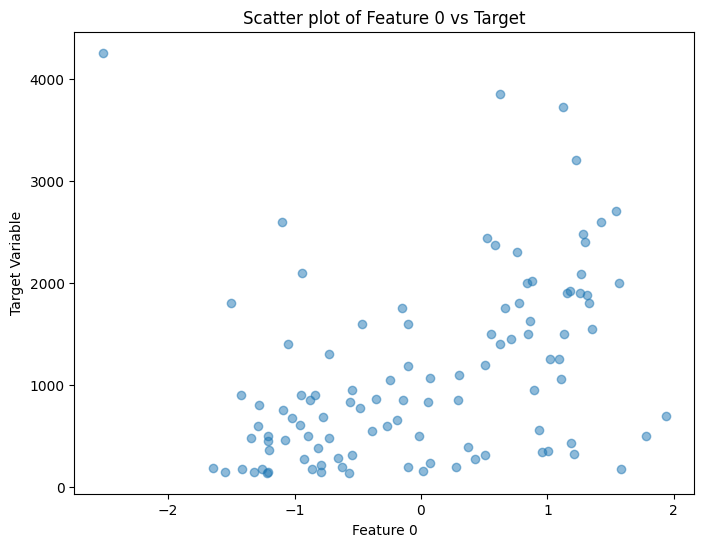

Correlation between Feature 0 and Target Variable: 0.3598923506738516


In [ ]:
import matplotlib.pyplot as plt

selected_features = np.where(Lasso_parameter != 0)[0]
print(selected_features)

feature_index = selected_features[0] if len(selected_features) > 0 else 0
plt.figure(figsize=(8, 6))
plt.scatter(X_train[:, feature_index], y_train, alpha=0.5)
plt.xlabel(f"Feature {feature_index}")
plt.ylabel("Target Variable")
plt.title(f"Scatter plot of Feature {feature_index} vs Target")
plt.show()

# Calculate correlation between the first selected feature and the target variable
feature_index = selected_features[0]
correlation_coefficient = np.corrcoef(X_train[:, feature_index], y_train)[0, 1]
print(f"Correlation between Feature {feature_index} and Target Variable: {correlation_coefficient}")

**Remember**: Make sure to complete all problems (.ipynb files) in this assignment. When you finish, double-check the submission instructions at the top of this file, and submit on JupyterHub.